In [1]:
import pandas as pd
import numpy as np

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [ ]:
df_first = pd.read_csv('myntra-train-cat-edited.csv',low_memory=False)

In [ ]:
len(df_first)

In [ ]:
df_first.head()

In [ ]:
x,y = np.unique(df_first['Sub_category'],return_counts=True)

In [ ]:
dict(zip(x,y))

In [ ]:
# df_use.to_csv('myntra-category-usable-images.csv',index=False)

In [ ]:
# len(df_use)

In [ ]:
df = pd.read_csv('myntra-category-usable-images.csv',low_memory = False)

In [ ]:
len(df)

In [ ]:
# df.to_csv('myntra-last.csv',index=False)

In [ ]:
# for i,row in df_first.iterrows():
#     count = 0
#     if '?' in row['Link_to_the_image']:
#         count= count+1
#         df_first.drop(df_first.index[i])
# len(df_first+" "+str(count))

In [ ]:
# df_first.to_csv('myntra-train-21-1.csv',index=False)

In [ ]:
df_last = pd.read_csv('myntra-last.csv',low_memory=False)

In [ ]:
df_last.head()

In [ ]:
x,y = np.unique(df_last['Sub_category'],return_counts=True)
dict(zip(x,y))

In [ ]:
len(df_last)

In [ ]:
dropTypo = 0
dropSolid = 0
dropStriped  =0
for i,row in df_last.iterrows():
    if row['Sub_category']=="Typography" and dropTypo<4000:
        print(dropTypo)
        df_last.drop(i,inplace=True)
        dropTypo = dropTypo+1
    if row['Sub_category']=="Striped" and dropStriped<2000:
        print(dropSolid)
        df_last.drop(i,inplace=True)
        dropStriped = dropStriped+1
    if row['Sub_category']=="Solid" and dropSolid<4000:
        print(dropStriped)
        df_last.drop(i,inplace=True)
        dropSolid = dropSolid+1

In [ ]:
df_underfit = df_last
df_underfit.head()

In [ ]:
x,y = np.unique(df_last['Sub_category'],return_counts=True)
dict(zip(x,y))

In [ ]:
df_last.to_csv('myntra-last-2.csv',index=False)

In [ ]:
df_last = pd.read_csv('myntra-last-2.csv',low_memory=False)

In [ ]:
df_last.head()

In [3]:
sz = 600
arch = dn161
bs = 32
path='data/hackerearth-myntra'

In [4]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.CENTER)

In [5]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last-2.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=0)

In [6]:
# %cd $path
# %rm -r tmp

In [7]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

In [8]:
len(data.classes)

24

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 78%|███████▊  | 1132/1459 [00:14<00:04, 77.84it/s, loss=6.27]

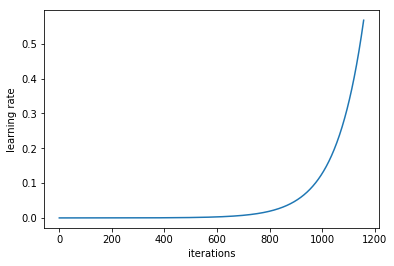

In [9]:
lrf=learn.lr_find()
learn.sched.plot_lr()

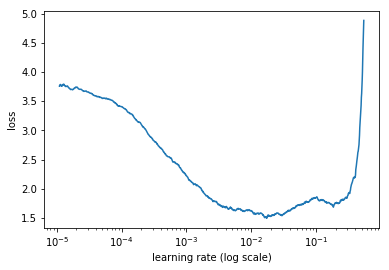

In [10]:
learn.sched.plot()

In [11]:
learn.fit(0.005,40)

HBox(children=(IntProgress(value=0, description='Epoch', max=40), HTML(value='')))

  7%|▋         | 95/1459 [00:02<00:38, 35.07it/s, loss=1.9] 

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.267166   1.096029   0.672089  
    1      1.149454   1.042957   0.682705                     
    2      1.10121    1.011312   0.693031                     
    3      1.053905   1.007835   0.693476                     
    4      1.02649    0.977398   0.707072                     
    5      1.043537   0.961074   0.710034                      
    6      1.010942   0.961229   0.709092                      
    7      1.002996   0.947811   0.712123                      
    8      0.924941   0.94647    0.715034                      
    9      0.927194   0.938403   0.718887                      
    10     0.910684   0.926605   0.72387                       
    11     0.926517   0.928877   0.716969                      
    12     0.88059    0.918932   0.725223                      
    13     0.872153   0.923416   0.724315                      
    14     0.85363    0.927124   0.722825                      
 

[0.91060573, 0.7356678082518382]

In [ ]:
lr = 0.1
lrs = np.array([lr/9,lr/3,lr])

In [ ]:
learn.unfreeze()
learn.fit(lrs, 2, cycle_len=1, cycle_mult=2)

In [ ]:
learn.fit(lr, 4, cycle_len=1, cycle_mult=2)

In [12]:
log_preds,y = learn.TTA()


In [13]:
probs = np.mean(np.exp(log_preds),0)

In [14]:
accuracy_np(probs, y)

0.73620157696263289

In [15]:
y[10]=9

In [16]:
predictions = np.argmax(probs,axis=1)

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predictions)

In [18]:
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(12,12))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Normalized confusion matrix
[[ 0.28085  0.01489  0.00638  0.       0.00426  0.04043  0.04894  0.10213  0.1766   0.       0.02128  0.
   0.02553  0.       0.00213  0.09362  0.00426  0.       0.03617  0.00638  0.00638  0.00213  0.12766  0.     ]
 [ 0.02778  0.55556  0.       0.       0.       0.00694  0.00694  0.       0.13889  0.       0.02083  0.
   0.02083  0.       0.       0.01389  0.       0.       0.       0.00694  0.       0.       0.20139  0.     ]
 [ 0.04     0.       0.6      0.       0.       0.       0.02     0.04     0.14     0.       0.04     0.       0.
   0.       0.       0.04     0.       0.       0.04     0.       0.02     0.       0.02     0.     ]
 [ 0.02326  0.       0.       0.53488  0.       0.       0.       0.13953  0.06977  0.       0.       0.       0.
   0.       0.02326  0.13953  0.       0.       0.04651  0.       0.       0.       0.02326  0.     ]
 [ 0.       0.       0.       0.00214  0.61752  0.00427  0.       0.00641  0.00427  0.       0.       0.    

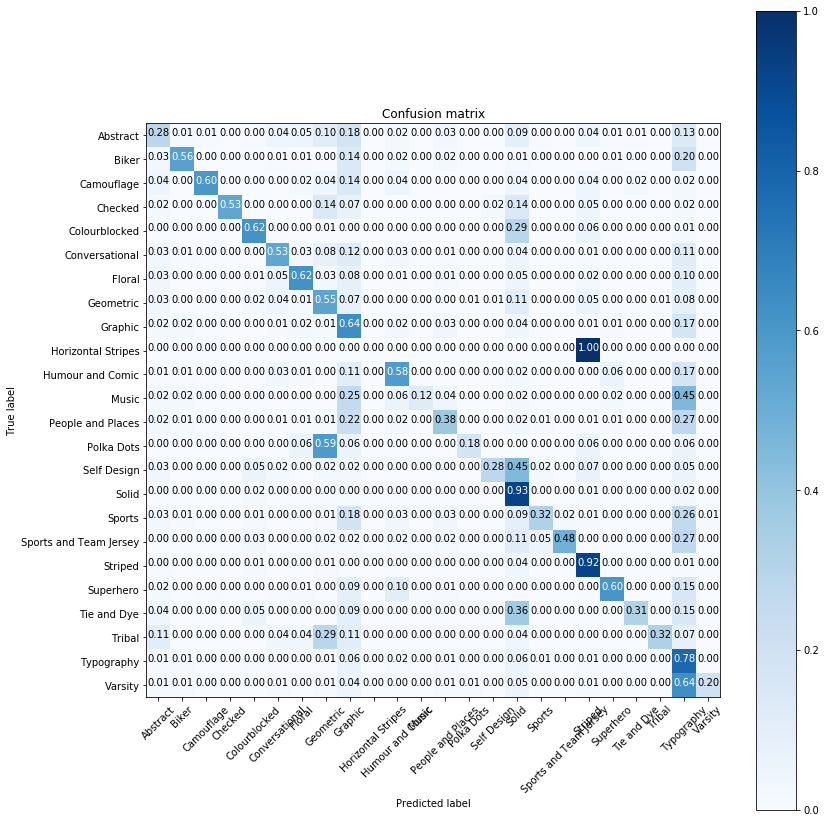

In [19]:
plot_confusion_matrix_mine(cm,data.classes,normalize=True)

In [20]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)

In [21]:
preds = predictions
PATH = 'data/hackerearth-myntra/'

Correctly classified


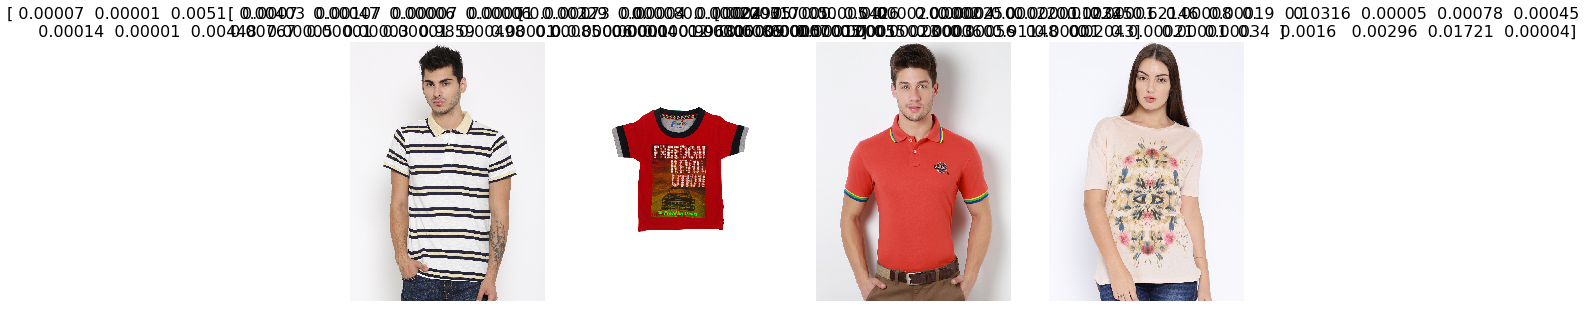

In [22]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


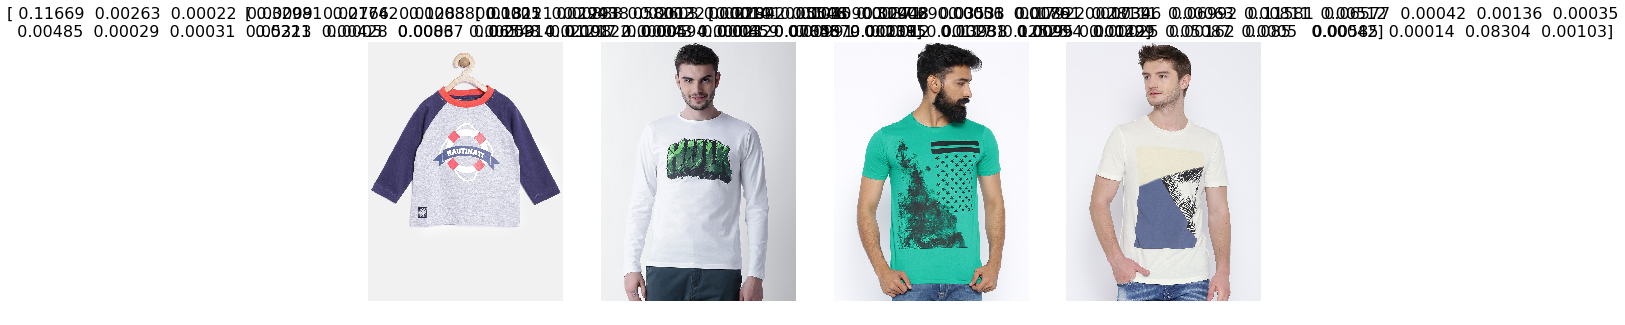

In [27]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [28]:
learn.unfreeze()

In [ ]:
learn.fit(0.01,1)

In [ ]:
learn.summary()

In [29]:
fname = '/home/paperspace/data/hackerearth-myntra/test/11476446167866-2GO-Women-Grey-Solid-V-Neck-T-Shirt-3201476446167715-1.jpg'

In [ ]:
learn.freeze()

In [30]:
test = open_image(fname)
test= val_tfms((test))
test.shape
# print(test.shape)
# cv2.imwrite('test.png',test)



(3, 500, 500)

In [31]:
pred = learn.predict_array(test[None])
data.classes[np.argmax(pred[0,:])]

'Solid'

In [32]:
import pandas as pd

path = 'data/hackerearth-myntra'

In [33]:
df = pd.read_csv(f'myntra-submission_online-final.csv', low_memory=False)

In [34]:
df.head()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
0,Allen Solly,Tshirts,Men,Red,http://myntra.myntassets.com/assets/images/182...,NaN
1,Celio,Tshirts,Men,Yellow,http://myntra.myntassets.com/assets/images/109...,NaN
2,CULT FICTION,Tshirts,Men,Rust,http://myntra.myntassets.com/assets/images/159...,NaN
3,Antigravity,Tshirts,Women,Blue,http://myntra.myntassets.com/assets/images/185...,NaN
4,Being Human,Tshirts,Men,Charcoal,http://myntra.myntassets.com/assets/images/100...,NaN


In [ ]:
count = 0
for i,row in df.iterrows():
    try:
        pic_link = row['Link_to_the_image']
        if "?dl=1" in pic_link:
            count= count+1
            df.loc[i,'Link_to_the_image']=pic_link.replace("?dl=1","")
    except:
        print("noFound")

In [ ]:
count

In [ ]:
# df.to_csv('myntra-submission_online-final.csv',index=False)

In [35]:
count =0
for i,row in df.iterrows():
    pic_link = row['Link_to_the_image'] 
    try:
        pic_name_temp = pic_link.split('/')
        pic_name = pic_name_temp[len(pic_name_temp)-1]
        full_path_name = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
        img = val_tfms(open_image(full_path_name))
        pred = learn.predict_array(img[None])
        temp_data = data.classes[np.argmax(pred)]
        df.loc[i,'Sub_category']=temp_data
        print(str(i)+temp_data)
    except:
        print(pic_link)
        df.loc[i,'Sub_category']='Solid'
print(count)

0Solid
1Solid
2Solid
3Typography
4Graphic
5Checked
6Typography
7Typography
8Solid
9Solid
10Graphic
11Graphic
12Biker
13Striped
14Striped
15Typography
16Solid
17Typography
18Striped
19Solid
20Solid
21Typography
22Solid
23Solid
24Floral
25Solid
26Striped
27Solid
nan
29Solid
30Typography
31Typography
32Striped
33Striped
34Typography
35Typography
36Floral
37Solid
38Typography
39Colourblocked
40Solid
41Graphic
42Floral
43Camouflage
44Striped
45Solid
46Solid
47Typography
48Graphic
49Graphic
50Typography
51Typography
52Striped
53Solid
54Solid
55Solid
56Typography
57Typography
58Solid
59Conversational
60Typography
61Graphic
62Typography
63Solid
64Typography
65Typography
66Solid
67Typography
68Typography
69Solid
70Solid
71Typography
http://repo.karvyecom.com/image-repository/Classic/PERLE-SLT/PERLE-SLT_1.jpg
73Graphic
74Striped
75Solid
76Typography
77Colourblocked
78Superhero
79Solid
80Typography
81Solid
82Solid
83Sports
84Striped
85Solid
86Typography
87Graphic
88Striped
89Solid
90People and Pl

703Solid
704Solid
705Graphic
706Solid
707Striped
708Solid
709Solid
710Striped
711Typography
712Graphic
713Sports
714Sports
715Typography
716Solid
717Typography
718Striped
719Solid
720Typography
721Solid
722Solid
723Solid
724Typography
725Solid
726Superhero
727Typography
728Striped
729Typography
730Solid
731Typography
732Geometric
733Striped
nan
735Solid
736Solid
737Solid
738Solid
739Graphic
740Geometric
741Colourblocked
742Typography
743Solid
744Solid
745Graphic
746Typography
747Colourblocked
748Typography
749Solid
750People and Places
751Solid
752Solid
753Solid
754Superhero
755Typography
756Solid
757Tribal
758Solid
759Solid
760Floral
761Striped
762Typography
763Striped
764Solid
765Typography
766Floral
767Typography
768Graphic
769Striped
770Typography
771Solid
772Solid
773Sports
774Striped
775Striped
776Typography
777Solid
778Typography
779Solid
780Typography
781Striped
782Striped
783Typography
784Typography
785Solid
786Typography
787Solid
788Typography
789Solid
790Superhero
791Graphic

1381Solid
1382Solid
1383Solid
1384Typography
1385Solid
1386Solid
nan
1388Solid
1389Solid
1390Typography
1391Conversational
1392Solid
1393Typography
1394Typography
1395Typography
1396Striped
1397Typography
1398Graphic
1399Solid
1400Typography
1401Graphic
1402Solid
1403Typography
1404Typography
1405Typography
1406Graphic
1407Typography
1408Graphic
1409Typography
1410Solid
1411Solid
1412Solid
1413Abstract
1414Graphic
1415Typography
1416Solid
1417Solid
1418Solid
1419Graphic
1420Solid
1421Typography
1422Typography
1423Typography
1424Solid
1425Striped
1426Striped
1427Typography
1428People and Places
1429Typography
1430Solid
1431Solid
1432Solid
1433Solid
1434People and Places
1435Striped
1436Solid
1437Graphic
1438Typography
1439Striped
1440Striped
1441Typography
1442Solid
1443Solid
1444Solid
1445Typography
1446Striped
1447Solid
1448Typography
1449Solid
1450Striped
1451Typography
1452Solid
1453Solid
1454Graphic
1455Solid
nan
1457Abstract
1458Typography
1459Conversational
1460Geometric
1461Soli

2026Typography
2027Striped
2028Striped
2029Striped
2030Solid
2031Solid
2032Striped
2033Typography
2034Typography
2035Colourblocked
2036Striped
2037Geometric
2038Typography
2039Typography
2040Floral
2041Floral
2042Solid
2043Solid
2044Typography
2045Typography
2046Striped
2047Solid
2048Solid
2049Solid
2050Solid
2051Solid
2052Floral
2053Striped
2054Typography
nan
2056Striped
2057Solid
2058Graphic
2059Solid
2060Striped
2061Typography
2062Graphic
2063Striped
2064Graphic
2065Solid
2066Graphic
2067Typography
2068Solid
2069Graphic
2070Solid
2071Solid
2072Conversational
2073Colourblocked
2074Graphic
2075Solid
2076Graphic
2077Solid
2078Solid
2079Typography
2080Typography
2081Solid
2082Typography
2083Solid
2084People and Places
2085Solid
2086Solid
2087Solid
2088Solid
2089Striped
2090Typography
2091Conversational
2092Typography
2093Striped
2094Solid
2095Solid
2096Typography
2097Solid
2098Typography
2099Solid
2100Sports
2101Conversational
2102Solid
2103Typography
2104Solid
2105Solid
2106Solid
2107S

2677Graphic
2678Graphic
2679Typography
2680Solid
2681Graphic
2682Typography
2683Typography
2684Striped
2685Floral
2686Solid
2687Striped
2688Floral
2689Striped
2690Striped
2691Typography
2692Solid
2693Striped
2694Humour and Comic
2695Typography
2696Solid
2697Striped
2698Solid
2699Conversational
2700Typography
2701Typography
2702Solid
2703Solid
2704Solid
2705Solid
2706Graphic
2707Typography
2708Typography
2709Solid
2710Graphic
2711Solid
2712Solid
2713Typography
2714Typography
2715Solid
2716Solid
2717Solid
2718Typography
2719Striped
2720Graphic
2721Solid
2722Sports
2723Typography
2724Geometric
2725Solid
2726Typography
2727Striped
nan
2729Solid
2730Solid
2731People and Places
https://www.dropbox.com/s/ej4fvmfcbv8v1wu/6%2C1.jpg
2733Typography
2734Typography
2735Solid
2736Solid
2737Striped
2738Geometric
2739Solid
2740Typography
2741Striped
2742Typography
2743Solid
2744Typography
nan
2746Striped
2747Striped
2748People and Places
2749Solid
2750Solid
2751Striped
2752Colourblocked
2753Solid
2754

3331Solid
3332Graphic
3333Colourblocked
3334Typography
3335Solid
3336Graphic
3337Typography
3338Graphic
3339Typography
nan
3341Typography
3342Floral
3343Solid
3344Solid
3345Typography
3346Typography
3347Typography
3348Typography
3349Solid
3350Humour and Comic
3351Graphic
3352People and Places
3353Striped
3354Solid
3355Striped
3356Abstract
3357Sports and Team Jersey
3358People and Places
3359Solid
3360Solid
3361Abstract
3362Graphic
3363Graphic
3364Typography
3365Solid
3366Striped
3367Graphic
3368Floral
3369Solid
3370Typography
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2779_White/FLIPKART_2.jpg
3372Typography
3373People and Places
3374Conversational
3375Solid
3376Typography
3377Superhero
3378Typography
3379Graphic
3380Solid
3381Solid
3382Solid
3383Solid
3384Geometric
3385Solid
3386Striped
3387Typography
3388Solid
3389Solid
3390Striped
3391Solid
3392Solid
3393Tribal
3394Solid
3395Solid
3396Solid
3397Typography
3398Solid
3399Typography
3400Solid
3401Typography
3402Ty

3966Solid
3967Typography
3968Sports and Team Jersey
3969Solid
3970Solid
3971Typography
3972Striped
3973Solid
3974Solid
3975Graphic
3976Graphic
3977Solid
3978Striped
3979Solid
3980Floral
3981Sports and Team Jersey
3982Graphic
3983Solid
3984Typography
3985Solid
3986Striped
3987Superhero
3988Solid
3989Typography
3990Solid
3991Solid
3992Conversational
3993Typography
3994Solid
3995Typography
nan
3997Solid
3998Solid
3999People and Places
4000Solid
4001Typography
4002Graphic
4003Solid
4004Solid
4005Solid
4006Solid
4007Superhero
4008Solid
4009Typography
4010Typography
4011Graphic
4012Striped
4013Typography
nan
4015Graphic
4016Solid
4017Solid
4018Solid
4019Conversational
4020Typography
4021Striped
4022Typography
4023People and Places
4024Colourblocked
4025Typography
4026Solid
4027Solid
4028Striped
4029Solid
4030Solid
4031Solid
4032People and Places
4033Typography
4034Colourblocked
4035Solid
4036Striped
4037Typography
4038Typography
4039Typography
4040Typography
4041Typography
4042Typography
404

4602Typography
4603Graphic
4604Typography
4605Striped
4606People and Places
4607Solid
4608Abstract
4609Striped
4610Solid
4611Striped
4612Graphic
4613Solid
nan
4615Striped
4616Graphic
4617Striped
4618Graphic
4619Solid
4620People and Places
4621Graphic
4622Solid
4623Typography
4624Typography
4625Geometric
4626Typography
4627Graphic
4628Solid
4629Striped
4630Solid
4631Solid
4632Solid
4633Solid
4634Typography
4635Typography
4636Solid
4637Typography
4638Solid
4639Typography
4640Solid
4641Typography
4642Solid
4643Striped
4644Typography
4645Solid
4646Solid
4647Typography
4648Typography
4649Typography
4650Humour and Comic
4651Solid
4652Graphic
4653Solid
4654Solid
4655Solid
4656Solid
4657Graphic
4658Graphic
4659Floral
4660Solid
4661Solid
4662Typography
4663Geometric
4664Solid
4665Striped
4666Graphic
4667Striped
4668Colourblocked
4669Striped
4670Striped
4671Geometric
4672Solid
4673Biker
4674Typography
4675Typography
4676Striped
4677Striped
4678Humour and Comic
4679Geometric
4680Camouflage
4681So

5227Colourblocked
5228Humour and Comic
5229Solid
5230Solid
5231Typography
5232Striped
5233Graphic
5234Humour and Comic
5235Solid
5236Solid
5237Solid
5238Graphic
5239Solid
5240Typography
5241Striped
5242Solid
5243Typography
5244Striped
5245Colourblocked
5246Solid
5247Solid
5248Solid
5249Graphic
5250Graphic
5251People and Places
5252Solid
5253Geometric
5254Solid
5255Typography
5256Solid
5257Conversational
5258Typography
5259Typography
5260Typography
5261Typography
5262Solid
5263Solid
5264Solid
5265Striped
5266Typography
5267Solid
5268Colourblocked
5269Typography
5270Solid
5271Striped
5272Graphic
5273Solid
5274Solid
5275Solid
5276Striped
5277Solid
5278Colourblocked
5279Typography
5280Striped
5281People and Places
5282Graphic
5283People and Places
5284Typography
5285Typography
5286Solid
5287Graphic
5288Striped
5289Floral
5290Typography
5291Solid
5292Graphic
5293Typography
nan
5295Typography
5296Solid
5297Striped
5298Solid
5299Solid
5300Typography
5301Solid
5302Typography
5303Typography
530

5882Solid
5883Solid
5884Graphic
5885Solid
5886Colourblocked
5887Typography
5888Colourblocked
5889Graphic
5890Striped
5891Typography
5892Solid
5893Typography
5894Solid
5895Typography
5896Typography
5897Sports
5898Solid
5899Solid
5900Solid
5901Solid
5902Solid
5903Solid
5904Solid
5905Solid
5906Solid
5907Typography
5908Solid
5909Solid
5910Solid
5911Solid
5912Striped
5913Typography
5914Striped
5915Typography
5916Graphic
5917Solid
5918Humour and Comic
5919Typography
5920Typography
5921Solid
5922Solid
5923Geometric
5924Solid
5925Graphic
5926Solid
5927Graphic
5928Striped
5929Typography
5930Solid
5931Colourblocked
5932Solid
5933Solid
5934Typography
5935Solid
5936Typography
5937Solid
5938Solid
5939Solid
5940Solid
5941Solid
5942Solid
5943Striped
5944Solid
5945Solid
5946Solid
5947Typography
5948Solid
5949Solid
5950Solid
5951Solid
5952Solid
5953Striped
5954Striped
5955Typography
5956Striped
5957Colourblocked
5958Solid
5959Striped
5960Superhero
nan
5962Typography
5963Graphic
5964Typography
5965Solid

6529Graphic
6530Striped
6531Typography
6532Humour and Comic
6533Solid
6534Graphic
6535Solid
6536Solid
6537Varsity
6538Striped
6539People and Places
6540Solid
6541Striped
6542Solid
6543Striped
6544Solid
6545Abstract
6546Typography
6547Graphic
6548Solid
6549Geometric
6550Solid
6551Typography
6552Music
6553Typography
6554Striped
nan
6556Typography
6557Solid
nan
6559Solid
6560Typography
6561Solid
6562Colourblocked
6563Typography
6564Solid
6565Solid
6566Solid
6567People and Places
6568Typography
6569Typography
6570Typography
6571Striped
6572Graphic
6573Striped
nan
6575Solid
6576Solid
6577Solid
6578Colourblocked
6579Floral
6580Solid
6581Geometric
6582Typography
6583Typography
6584Sports
6585Typography
6586Solid
6587Typography
6588Typography
6589Solid
6590Solid
6591Polka Dots
6592Striped
6593Striped
6594Solid
6595Solid
6596Solid
6597Striped
6598Graphic
6599Colourblocked
6600Solid
6601People and Places
6602Typography
6603Music
6604Solid
6605Solid
6606Striped
6607Typography
6608Graphic
6609Flor

7189Solid
7190Typography
7191Floral
7192Graphic
7193Typography
7194Geometric
7195Solid
7196Solid
7197Solid
7198Solid
7199Conversational
7200Striped
7201Solid
7202Solid
7203Solid
7204Typography
7205Solid
7206Striped
7207Geometric
7208Solid
7209Striped
7210Superhero
nan
7212Solid
7213Solid
7214Typography
7215Conversational
7216Striped
7217Graphic
7218Solid
7219Graphic
7220Graphic
7221Graphic
7222Typography
7223Solid
7224Solid
7225Striped
7226Graphic
7227Graphic
7228Solid
7229Solid
7230Conversational
7231Geometric
7232Graphic
7233Colourblocked
7234Typography
7235Solid
7236Solid
7237Typography
7238Colourblocked
7239Solid
7240Solid
7241Striped
7242Solid
7243Typography
7244Solid
7245Typography
7246Typography
7247Striped
7248Typography
7249Geometric
7250Solid
7251Striped
7252Solid
7253Graphic
7254Graphic
7255Striped
7256Solid
7257Camouflage
7258Striped
7259People and Places
7260Striped
7261Solid
7262Solid
7263Solid
7264Solid
7265Solid
7266Solid
7267Solid
7268Solid
7269Solid
7270Typography
727

7827Solid
7828Graphic
7829Typography
7830Typography
7831Typography
7832Typography
nan
7834Typography
7835Typography
7836Solid
7837Solid
7838Typography
7839Solid
7840Solid
7841Solid
7842Solid
7843Solid
7844Solid
7845Solid
7846Typography
7847Graphic
7848Typography
7849Typography
7850Solid
7851Solid
7852Graphic
7853Typography
7854Typography
7855Typography
7856Striped
7857Solid
7858Typography
7859Solid
7860Solid
7861People and Places
7862Striped
7863Solid
7864Typography
7865Striped
7866Solid
7867Solid
7868Graphic
7869Typography
7870Solid
7871Striped
nan
7873Striped
7874Graphic
7875Typography
7876People and Places
7877Striped
7878Solid
7879Solid
7880Typography
7881Typography
7882Striped
7883Graphic
7884Graphic
7885Solid
7886Solid
7887Graphic
7888Graphic
7889Solid
7890Humour and Comic
7891Solid
7892Typography
7893Solid
7894Striped
7895Solid
7896Striped
7897Solid
7898Typography
7899Solid
7900Striped
7901Solid
7902Solid
7903Typography
7904Solid
7905Solid
7906Typography
7907Typography
7908Typog

8481Striped
8482Solid
8483Typography
8484Graphic
8485Striped
8486Solid
8487Graphic
8488Solid
8489Biker
8490Solid
8491Typography
8492Solid
8493Typography
8494Striped
8495Solid
8496Solid
8497Solid
8498Typography
8499Solid
8500Solid
8501Solid
8502Solid
8503Typography
8504Typography
8505Solid
8506Graphic
8507Solid
8508Solid
8509Typography
8510Solid
8511Solid
8512Typography
8513Solid
8514Striped
8515Solid
8516Striped
nan
8518Striped
8519Solid
8520Solid
8521Typography
8522Solid
8523Typography
8524Graphic
8525Solid
8526Solid
8527Solid
8528Striped
8529Graphic
8530Typography
8531Solid
8532Solid
8533Geometric
8534Solid
8535Typography
8536Superhero
8537Graphic
8538Solid
8539Solid
http://cdn.myeshopbox.com/flipkart_images/duke-45-styles-lot24/LF2633_White/FLIPKART_2.jpg
8541Humour and Comic
8542Typography
8543Striped
8544Solid
8545Typography
8546Solid
8547Typography
8548Typography
8549Colourblocked
8550Striped
8551Solid
8552Conversational
8553Typography
8554Typography
8555Typography
8556Solid
8557

9120Solid
9121Solid
9122Solid
9123Typography
9124Solid
9125Typography
9126Striped
9127Solid
9128Typography
9129Typography
9130Typography
9131Typography
9132Solid
9133Typography
9134Solid
9135Solid
9136Striped
9137Graphic
9138Typography
9139Solid
9140Solid
9141Typography
9142Solid
9143Solid
nan
9145Solid
9146Graphic
9147Typography
9148Solid
9149Typography
9150Colourblocked
9151Solid
9152Typography
9153Solid
9154Typography
9155Typography
9156Solid
9157Solid
9158Solid
9159Solid
9160Solid
9161Solid
9162Solid
9163Typography
9164Solid
9165Solid
9166Typography
9167Striped
9168Solid
9169Typography
9170Solid
9171Typography
9172Solid
9173Typography
9174Striped
9175Typography
9176Solid
9177Solid
9178Solid
9179Conversational
9180Solid
9181Sports
9182Striped
9183Typography
9184Solid
9185Solid
9186Typography
9187Geometric
9188Typography
9189People and Places
9190Solid
9191Superhero
9192Graphic
9193Solid
9194Solid
9195Checked
9196Graphic
9197Typography
9198People and Places
9199Typography
9200Typogra

9768Graphic
9769Solid
9770Typography
9771Typography
9772Striped
9773Solid
9774Solid
9775Solid
9776Solid
9777People and Places
9778Striped
9779Striped
9780Striped
9781Conversational
9782Graphic
9783Striped
9784Typography
9785Solid
9786Solid
9787Floral
9788Typography
9789Graphic
9790Typography
9791Typography
9792Typography
9793Solid
9794Graphic
9795Graphic
9796Typography
9797Solid
9798Conversational
9799Solid
9800Biker
9801Striped
9802Graphic
9803Graphic
9804Graphic
9805Typography
9806Solid
9807Typography
nan
9809Solid
9810Solid
9811Solid
9812Typography
9813Typography
9814Typography
9815Sports and Team Jersey
9816Striped
9817Typography
9818Solid
9819Solid
9820Biker
9821Solid
9822Graphic
9823People and Places
9824Striped
9825Striped
9826Solid
9827Striped
9828Typography
9829Striped
9830People and Places
9831Typography
9832Solid
9833Typography
9834Typography
9835Typography
9836Striped
9837Striped
9838Typography
9839Conversational
9840Solid
9841Typography
9842Solid
9843Typography
9844Typogra

10386Solid
10387Solid
10388Graphic
10389Typography
10390Typography
10391Graphic
10392Solid
10393Typography
10394Geometric
10395Typography
10396Typography
10397Typography
10398Typography
10399Typography
10400Typography
10401Typography
10402Striped
10403Typography
10404Solid
10405Geometric
10406Typography
10407Typography
10408Typography
10409Graphic
10410Solid
10411Solid
10412Striped
10413Solid
10414Striped
10415Solid
10416Striped
10417Typography
nan
10419Typography
10420Striped
10421Typography
10422Solid
10423Typography
10424Typography
10425Typography
10426People and Places
10427Typography
10428Solid
10429Solid
10430Floral
10431Solid
10432Typography
10433Solid
10434Floral
10435Solid
10436Humour and Comic
10437Abstract
10438Striped
10439Solid
10440Solid
10441Typography
10442Solid
10443Graphic
10444Solid
10445Typography
10446Typography
10447Striped
10448Typography
10449Solid
10450Striped
10451Solid
10452Typography
10453Graphic
10454Striped
10455Solid
10456Solid
10457Solid
10458Striped
104

10969Striped
10970Solid
10971Solid
10972Graphic
10973Solid
10974Solid
10975Solid
10976Graphic
10977Typography
10978Typography
10979Solid
10980Typography
10981Typography
10982Typography
10983Typography
10984Solid
10985Solid
10986Geometric
10987Solid
10988Typography
10989Solid
10990Typography
10991Graphic
10992Graphic
10993Solid
10994Solid
10995Solid
10996Solid
10997Striped
10998Solid
10999Striped
11000Typography
11001Solid
11002Colourblocked
11003Superhero
11004Solid
11005People and Places
11006Striped
11007Solid
nan
11009Graphic
11010Typography
11011Geometric
11012Typography
11013Solid
11014Striped
11015Solid
11016Typography
11017Striped
11018Solid
11019Striped
11020Solid
11021Checked
11022Typography
11023Typography
11024Graphic
11025Solid
11026Solid
11027Striped
11028Solid
11029Typography
11030Abstract
11031Superhero
11032Typography
11033Solid
11034Typography
11035Solid
11036Solid
11037Typography
11038Typography
11039Solid
11040Typography
nan
11042Solid
11043Typography
11044Solid
1104

11565Typography
11566Typography
11567Geometric
11568Abstract
11569Graphic
11570Solid
11571Striped
11572Striped
11573Conversational
11574Striped
11575Solid
11576Solid
11577Graphic
11578Solid
11579Solid
nan
11581Typography
11582Typography
11583Solid
11584Solid
11585Striped
11586Conversational
11587Solid
11588Striped
11589Typography
11590Solid
11591Typography
11592Striped
11593Typography
11594Graphic
11595Typography
11596Graphic
11597Solid
11598Solid
11599Solid
11600Typography
11601Humour and Comic
11602Striped
11603Typography
11604Striped
11605Typography
11606Typography
11607Typography
11608Solid
11609Typography
11610Striped
11611Solid
11612Typography
11613Solid
11614Solid
11615Colourblocked
11616Striped
11617Typography
11618Solid
11619Striped
11620Striped
11621Solid
11622Typography
11623Striped
11624Striped
nan
11626Striped
11627Typography
11628Striped
11629Striped
11630Solid
11631Striped
11632Striped
11633Solid
11634Solid
11635Striped
11636Solid
11637Solid
11638Solid
11639Solid
11640So

12182Solid
12183Graphic
12184Solid
12185Striped
12186Graphic
12187Solid
12188Typography
12189Solid
12190Solid
12191Solid
12192Striped
12193Graphic
12194Solid
12195Conversational
12196Typography
12197Solid
12198Solid
12199Solid
12200Striped
12201Striped
12202Typography
12203Graphic
12204Floral
12205Solid
12206Typography
12207Typography
12208Striped
12209Typography
12210Humour and Comic
12211People and Places
12212Typography
12213Graphic
12214Graphic
12215Tribal
12216Geometric
12217Typography
12218Typography
12219Solid
12220Typography
12221Superhero
12222Solid
12223Typography
12224Solid
12225Solid
12226Solid
12227Solid
12228Solid
12229Typography
12230Typography
12231Humour and Comic
12232Colourblocked
12233Typography
12234Typography
12235Typography
12236Solid
12237Geometric
12238Solid
12239Solid
12240Solid
12241Striped
12242Solid
12243Typography
12244Solid
12245Striped
12246Striped
12247Typography
12248Typography
12249Solid
12250Solid
12251Typography
12252Sports
12253Typography
12254Soli

12786Colourblocked
12787Graphic
12788Solid
12789Solid
12790Typography
12791Solid
12792Typography
12793Solid
12794Typography
12795Solid
12796Graphic
12797Typography
12798Solid
12799Typography
12800Solid
12801Solid
12802Solid
12803Striped
12804Solid
12805Solid
12806Conversational
12807Typography
12808Striped
12809Geometric
12810Typography
12811Camouflage
12812Typography
12813Solid
12814Striped
12815Conversational
12816Typography
12817Typography
12818Varsity
12819Solid
12820Typography
12821Solid
12822Solid
12823Graphic
12824Typography
12825Solid
12826Striped
12827Striped
12828Solid
12829Typography
12830Solid
12831Typography
12832Solid
12833Solid
12834Solid
12835Solid
12836Striped
12837Solid
12838Solid
12839Solid
12840Typography
12841Solid
12842Solid
12843Solid
12844Striped
12845Solid
12846People and Places
12847Solid
12848Solid
12849Solid
12850Typography
12851Typography
12852Solid
12853Solid
12854Floral
12855Solid
12856Sports
12857Solid
12858Striped
12859Typography
12860Typography
12861St

13399Typography
13400Graphic
13401Music
13402Typography
13403Striped
13404Solid
13405People and Places
13406Floral
13407Solid
13408Solid
13409Graphic
13410Typography
13411Solid
13412Solid
13413Solid
13414Solid
nan
13416Striped
13417Typography
13418Solid
13419Solid
13420Solid
13421Solid
13422Solid
13423Typography
13424Solid
13425Solid
13426Graphic
13427Typography
13428Typography
13429Solid
13430Solid
13431Solid
13432People and Places
13433Typography
13434Humour and Comic
13435Typography
13436Biker
13437Solid
13438Solid
13439Striped
13440Typography
13441Striped
13442Striped
13443Solid
13444Geometric
13445Solid
13446Striped
13447Solid
13448Conversational
13449Typography
13450Typography
13451Solid
13452Typography
13453Typography
13454Typography
13455Typography
13456Graphic
nan
13458Striped
13459Humour and Comic
13460Solid
13461Typography
13462Solid
13463Striped
13464Colourblocked
13465Solid
13466Typography
13467Solid
13468Striped
13469Solid
13470Striped
13471Graphic
13472Solid
13473Typogra

14008Striped
14009Graphic
14010Typography
14011Solid
14012Striped
14013Solid
14014Solid
14015Solid
14016Abstract
14017Striped
14018Colourblocked
14019Striped
14020Solid
14021Solid
14022Floral
14023Solid
14024Solid
14025Solid
14026Graphic
14027Solid
14028Solid
14029Typography
14030Geometric
14031Striped
14032Typography
14033Solid
14034Typography
14035Typography
14036Solid
14037Solid
14038Solid
14039Striped
14040Solid
14041Solid
14042Solid
14043Graphic
14044Solid
14045Typography
14046Typography
14047Striped
14048Graphic
14049Typography
14050Striped
14051Solid
14052Typography
14053Striped
14054Solid
14055Striped
14056Typography
14057Solid
14058Typography
14059Solid
14060Sports
14061Typography
14062Solid
14063Solid
14064Striped
14065Typography
14066Striped
14067Geometric
14068Solid
14069Striped
14070Striped
14071Typography
14072Solid
14073Striped
14074Typography
14075Solid
14076Typography
14077Solid
14078Floral
14079Solid
14080Solid
14081Graphic
14082Striped
14083Solid
14084Solid
nan
14086

14623Solid
nan
14625Typography
14626Solid
14627Solid
14628Solid
14629Solid
14630Colourblocked
14631Striped
14632Solid
14633Solid
14634Striped
14635Typography
14636Solid
14637Solid
14638Superhero
14639Typography
14640Typography
14641Solid
14642Geometric
14643Solid
14644Striped
14645Solid
14646Typography
14647Solid
14648Solid
14649Typography
14650Typography
14651Solid
14652Solid
14653Solid
14654Solid
14655Striped
14656Solid
14657Solid
14658Graphic
14659Solid
14660Typography
nan
14662Typography
14663People and Places
14664Solid
nan
14666Solid
14667Typography
14668Solid
14669Typography
14670Solid
14671Typography
14672Solid
14673Solid
14674Striped
14675Solid
14676Self Design
14677Striped
14678Striped
14679Striped
14680Typography
14681Typography
14682Graphic
14683Striped
14684Typography
14685Typography
14686Striped
14687Solid
14688Graphic
14689Graphic
14690Striped
14691Graphic
14692Solid
14693Graphic
14694Solid
14695Graphic
14696Camouflage
14697Solid
14698Graphic
nan
14700Striped
14701Biker


In [36]:
df.tail()

,Brand,Category,Gender,Color,Link_to_the_image,Sub_category
14995,American Swan,Tshirts,Men,Blue,http://myntra.myntassets.com/assets/images/125...,People and Places
14996,Difference of Opinion,Tshirts,Men,Purple,http://myntra.myntassets.com/assets/images/143...,Typography
14997,Basics,Tshirts,Men,Red,http://myntra.myntassets.com/images/style/prop...,Striped
14998,Duke,Tshirts,Men,Blue,http://myntra.myntassets.com/assets/images/207...,Striped
14999,612 league,Tshirts,Boys,Navy Blue,http://myntra.myntassets.com/image/style/prope...,Typography


In [37]:
df.to_csv('23-myntra-2.csv',index=False)

# Second model FTW - Smaller size, Center crop ( didnt remove top and bottom)

In [38]:
sz = 300
arch = dn161
bs = 64
path='data/hackerearth-myntra'

In [39]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.CENTER)

In [ ]:
data_two = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last-2.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=4)

In [ ]:
learn_small = ConvLearner.pretrained(arch,data_two,precompute=True,ps=0.4)

 74%|███████▍  | 135/183 [02:27<00:52,  1.09s/it]

In [ ]:
learn_small.summary

In [ ]:
lrf=learn_small.lr_find()
learn_small.sched.plot_lr()

In [ ]:
learn_small.sched.plot()

In [ ]:
learn_small.fit(0.001,10)

In [ ]:
learn_small.fit(0.0005,10)

# Model 3 - try resnet -CENTER CROP and No resizing (CropType.CENTER)

In [ ]:
sz = 320
arch = resnet50
bs = 64
path='data/hackerearth-myntra'

In [ ]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,crop_type=CropType.CENTER)

In [ ]:
data = ImageClassifierData.from_csv(path='data/hackerearth-myntra/',folder='train',csv_fname='myntra-last-2.csv',tfms=(trn_tfms,val_tfms),bs=bs)

In [ ]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.4)

In [ ]:
lrf=learn.lr_find()
learn.sched.plot_lr()

In [ ]:
learn.sched.plot()

In [ ]:
learn.fit(0.005,40)